# Simple Logistic regression on the iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import datasets
import seaborn as sns

In [2]:
# import some data to play with
iris_ds = datasets.load_iris()
iris = pd.DataFrame(iris_ds.data, columns = iris_ds.feature_names)
# iris.describe()
# iris_ds

In [3]:
# pd.set_option('display.max_rows', None) # Display the entire Iris dataset
# iris

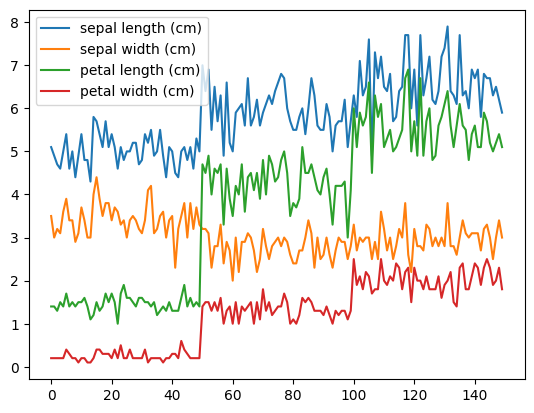

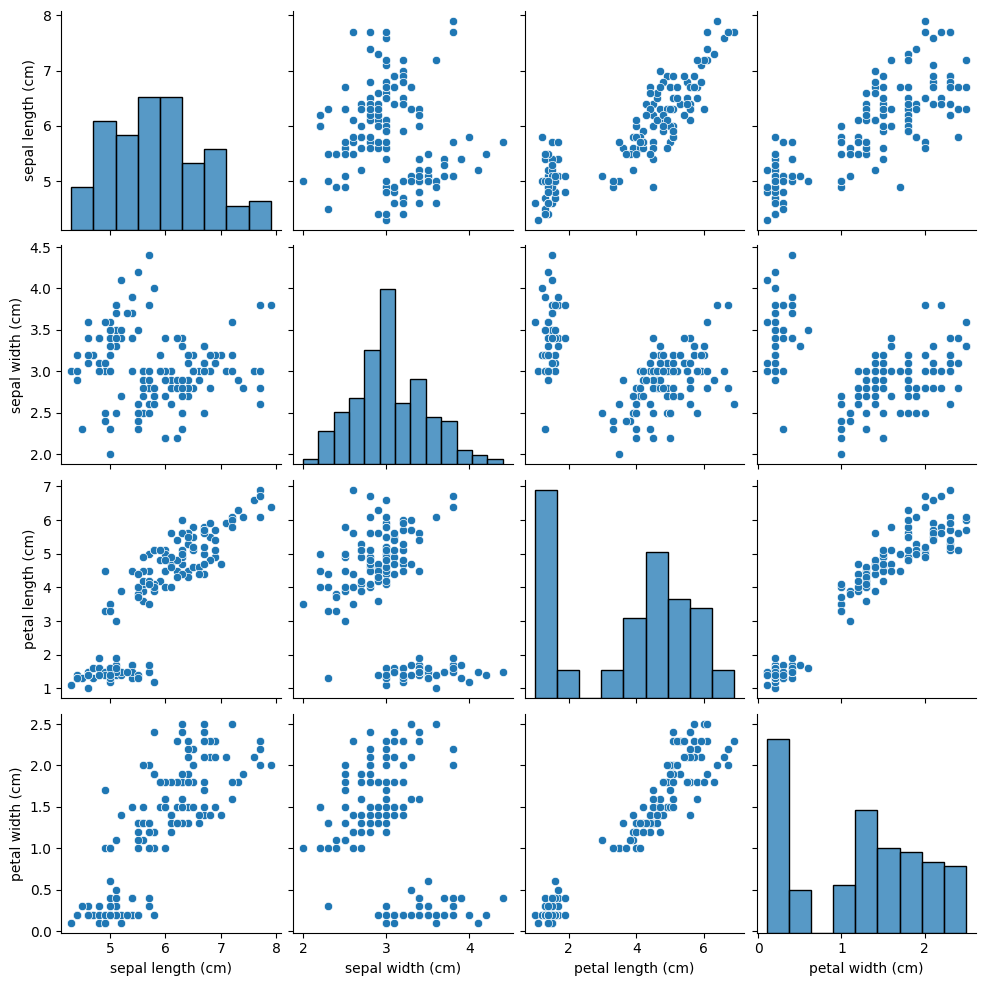

In [4]:
iris.plot()
_ = sns.pairplot(iris)

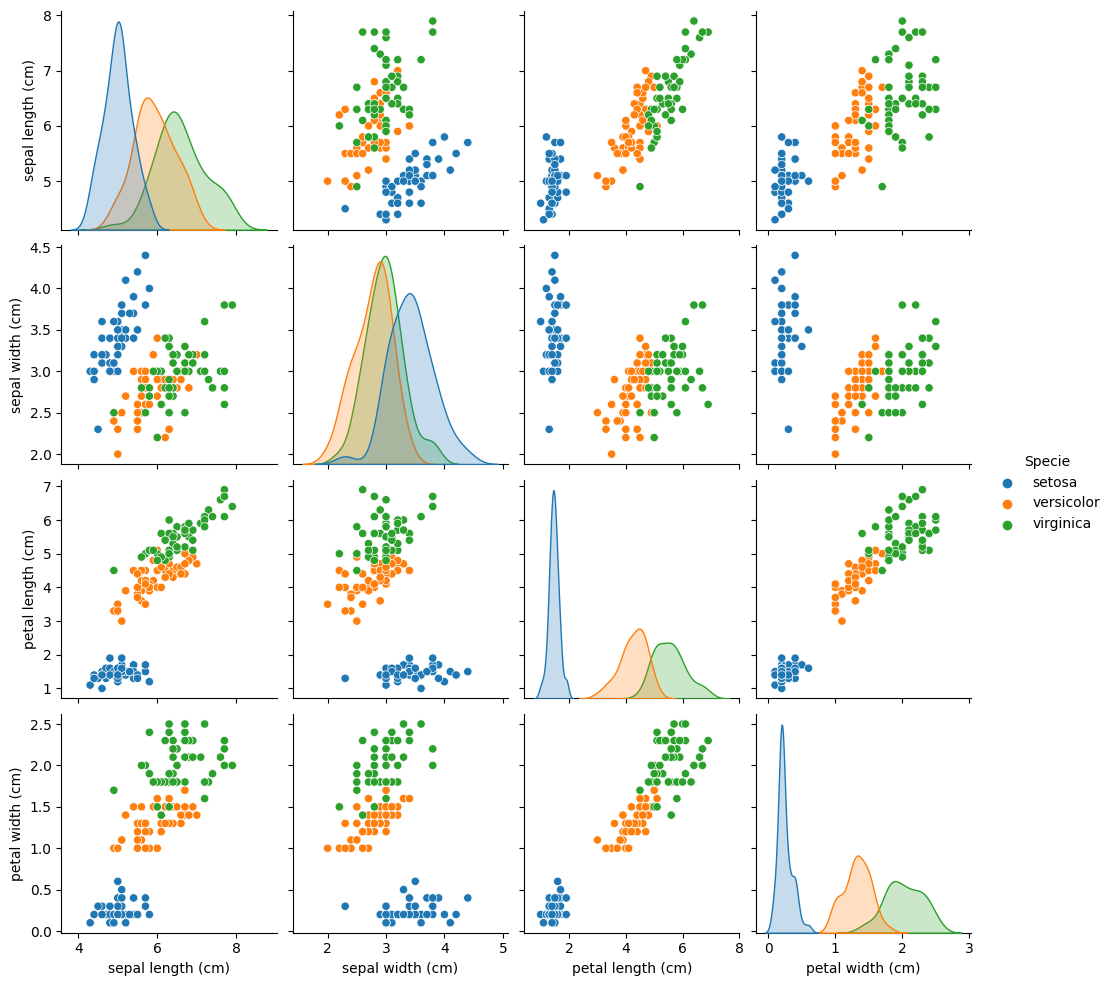

In [5]:
iris2 = iris
iris2['Specie']=iris_ds.target_names[iris_ds.target]
# Alternative command to suppress the function output
# ns.pairplot(iris2, hue="Specie");
_ = sns.pairplot(iris2, hue="Specie")

In [6]:
# sns.boxplot(iris2)

## Simple two class logistic (virginica vs not virginica)

The target variable $y_i$ is equal to $1$ if the corresponding observation refers to virginica and $0$ otherwise

In [7]:
# Split train/test partitions
# let's focus on one attribute only iris_ds.data[:, 3:]

X=iris_ds.data[:, 3:]

Y = np.zeros(len(iris_ds.target))
for i in range(len(Y)):
    if iris_ds.target[i]==2:
        Y[i]=1

(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=.2, shuffle=True)


In [8]:
sc = StandardScaler()

sc.fit(x_train)

x_train_sc = sc.transform(x_train)  # we only take the petal width feature
x_test_sc = sc.transform(x_test)

*Create an instance of Logistic Regression Classifier and fit the data*

In [9]:
logreg = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
logreg.fit(x_train_sc, y_train)
y_proba = logreg.predict_proba(X)

## predict_proba() returns the probabilities associated with the two possibile outcomes

In [10]:
y_proba

array([[7.91147269e-01, 2.08852731e-01],
       [7.91147269e-01, 2.08852731e-01],
       [7.91147269e-01, 2.08852731e-01],
       [7.91147269e-01, 2.08852731e-01],
       [7.91147269e-01, 2.08852731e-01],
       [6.46109424e-01, 3.53890576e-01],
       [7.24504752e-01, 2.75495248e-01],
       [7.91147269e-01, 2.08852731e-01],
       [7.91147269e-01, 2.08852731e-01],
       [8.45115233e-01, 1.54884767e-01],
       [7.91147269e-01, 2.08852731e-01],
       [7.91147269e-01, 2.08852731e-01],
       [8.45115233e-01, 1.54884767e-01],
       [8.45115233e-01, 1.54884767e-01],
       [7.91147269e-01, 2.08852731e-01],
       [6.46109424e-01, 3.53890576e-01],
       [6.46109424e-01, 3.53890576e-01],
       [7.24504752e-01, 2.75495248e-01],
       [7.24504752e-01, 2.75495248e-01],
       [7.24504752e-01, 2.75495248e-01],
       [7.91147269e-01, 2.08852731e-01],
       [6.46109424e-01, 3.53890576e-01],
       [7.91147269e-01, 2.08852731e-01],
       [5.58985134e-01, 4.41014866e-01],
       [7.911472

## To convert the probailities into classifer outcomes we resort to the argmax() function

In [11]:
np.argmax( (1,5,2,1))

dummy = np.array( [[ 1,2,0], [5, 0, 2]] )
display(dummy)

# np.argmax( dummy )
# np.argmax( dummy, axis=0)

array([[1, 2, 0],
       [5, 0, 2]])

In [12]:
# The axis parameter is used to apply argmax() operator row-wise
np.argmax(y_proba, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Evaluate our model

In [13]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = logreg.predict_proba(X_new)

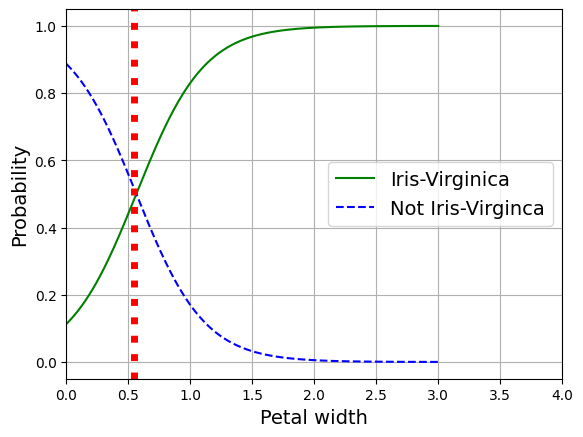

In [14]:
plt.figure(1)
# plt.plot(X,Y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xlim(0,4)
plt.legend(loc="center right", fontsize=14)
plt.grid()
plt.axvline(x=0.55, color="red", linewidth=5, linestyle=':')
plt.show()

In [15]:
# theta_0
logreg.intercept_

array([-2.06172841])

In [16]:
# theta_1
logreg.coef_

array([[3.64936824]])

### Predicting outcomes
 
sklearn classifiers have a predic() method that automatically applies argmax()

classifier accuracy is evaluated with the <A HREF=https://en.wikipedia.org/wiki/Confusion_matrix>confusion matrix</A>


Confusion matrix element $c_{i,j}$ reports the requency of outcomes with true lablel $i$ and predicted label $j$

In [17]:
y_pred = logreg.predict(x_test_sc)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[22  0]
 [ 0  8]]


## Generic K classes regression

### Now let us to fit a K=3 logistic model using two attributes

## $ \hat{y}_i = \frac{1}{1+e^{\theta_0} +\theta_1 x_{i,1}+\theta_2 x_{i,2}} $

In [18]:

X = sc.fit_transform(iris_ds.data[:, 2:])  # we  take the petal length and width features.
Y = iris_ds.target

(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=.2, shuffle=True)

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)


logreg_ml = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')

logreg_ml.fit(x_train_sc, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = logreg_ml.predict(x_test_sc)

y_pred

array([2, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1,
       2, 0, 2, 1, 0, 1, 1, 0])

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]


## Use an heatmap for nicely plotting the confusion matrix
See: https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

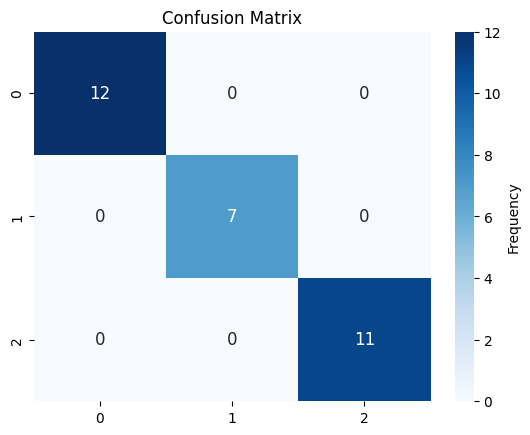

In [21]:
# Plot confusion matrix
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar_kws={'label':'Frequency'}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

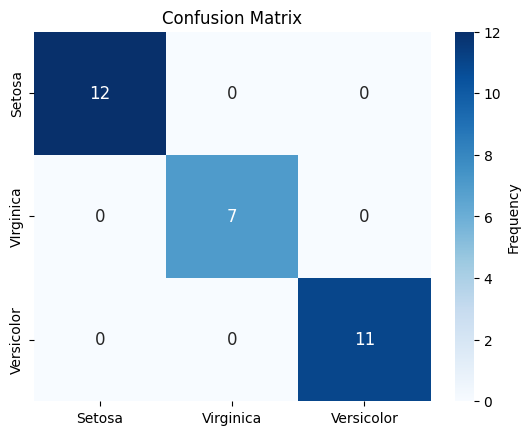

In [22]:
# Plot confusion matrix
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = pd.DataFrame(cm, columns=('Setosa','Virginica','Versicolor'))
df_cm.index = ['Setosa','VIrginica','Versicolor']
             
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar_kws={'label':'Frequency'}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
# plt.xlabel("True")
# plt.ylabel('Predicted')
plt.show()

## Try to use the pipelne + KFold approach ...


In [23]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

In [24]:
pipe = make_pipeline(
    # SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    StandardScaler(),
    LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto', max_iter=500),
    )

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Do k-fold cross-validation
cv_results_full = cross_validate(pipe, # Pipeline
                             X, # Feature matrix
                             Y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

# this call returns the test scoring only

cv_results = cross_val_score(pipe, # Pipeline
                             X, # Feature matrix
                             Y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [25]:
cv_results

array([1.        , 0.93333333, 0.96666667, 0.96666667, 0.93333333])

In [26]:
cv_results.mean()

0.96

In [27]:
ypred = cross_val_predict(pipe, X, Y, cv=kf)

In [28]:
Y.shape, ypred.shape

((150,), (150,))

In [29]:
cm = confusion_matrix(Y, ypred)

cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]])

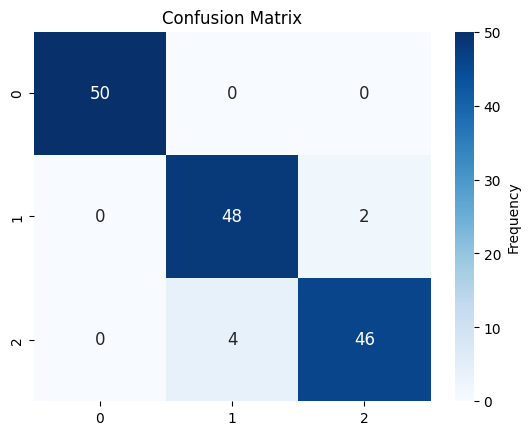

In [30]:
ax = plt.axes()
df_cm = pd.DataFrame(cm, columns=('Setosa','Virginica','Versicolor'))
df_cm.index = ['Setosa','VIrginica','Versicolor']
             
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, cbar_kws={'label':'Frequency'}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
# plt.xlabel("True")
# plt.ylabel('Predicted')
plt.show()